In [ ]:
import pandas as pd
from io import StringIO

# 기존 CSV 파일 읽기 (36행)
df_original = pd.read_csv("parsed_results.csv")

# 추가할 데이터 (CO-DMO-CT 데이터, 9행)
additional_data = """Workload  Section  Power  Util  CPU_Power  Memory_Power  Network_Power  Offloading_Ratio  CPU_Frequency_1  CPU_Frequency_0.5  CPU_Frequency_0.25  CPU_Frequency_0.125
0.1       CO-DMO-CT     2.43   0.18  0.44       1.50          0.48           0.70              15.33            17.00              31.33              36.33
0.2       CO-DMO-CT     4.27   0.34  0.99       2.12          1.15           0.73              12.66            24.66              27.00              35.66
0.3       CO-DMO-CT     5.05   0.46  1.08       2.02          1.93           0.79              15.66            16.00              30.33              38.00
0.4       CO-DMO-CT     6.44   0.58  1.42       2.37          2.64           0.79              16.33            23.33              29.66              30.66
0.5       CO-DMO-CT     7.37   0.72  1.57       2.36          3.43           0.81              14.00            23.33              29.33              33.33
0.6       CO-DMO-CT     8.76   0.77  2.03       2.49          4.23           0.82              18.66            27.66              23.00              30.66
0.7       CO-DMO-CT     9.86   0.94  2.41       2.47          4.97           0.81              20.66            22.00              29.33              28.00
0.8       CO-DMO-CT    12.81   0.91  4.56       2.82          5.42           0.77              22.66            27.00              30.33              20.00
0.9       CO-DMO-CT    14.02   0.82  4.67       2.94          6.40           0.82              25.00            25.00              30.00              20.00
"""

# 추가 데이터를 DataFrame으로 변환 (공백이 여러 개 있으므로 정규식 구분자 사용)
df_additional = pd.read_csv(StringIO(additional_data), sep=r"\s+")

# 원본 데이터와 추가 데이터를 합치기 (총 45행)
df_final = pd.concat([df_original, df_additional], ignore_index=True)

# 최종 CSV 파일로 저장
final_csv_filename = "parsed_results.csv"
df_final.to_csv(final_csv_filename, index=False)

print(f"최종 CSV 파일('{final_csv_filename}') 저장됨. 총 {len(df_final)}행입니다.")

최종 CSV 파일('parsed_results.csv') 저장됨. 총 54행입니다.


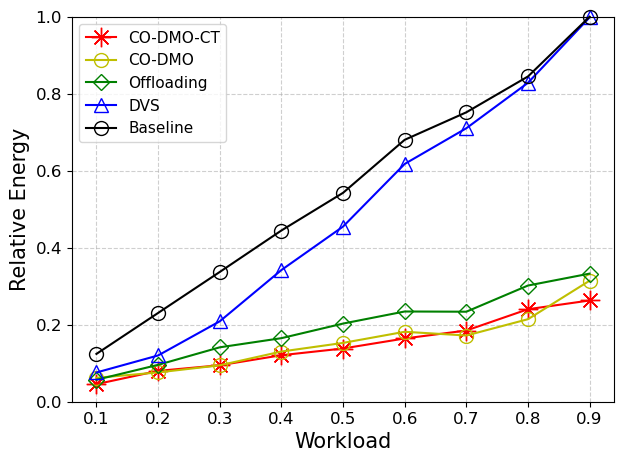

In [ ]:
# 1. Energy

import matplotlib.pyplot as plt
import numpy as np

# 파일 경로
file_path = "./parsed_results.csv"

# 데이터 저장용 딕셔너리 (5개 방법)
energy_data = {
    "Baseline": {},
    "DVFS": {},
    "Offloading": {},
    "CO-DMO": {},
    "CO-DMO-CT": {}
}

# 데이터 읽기 (CSV 파일이 쉼표로 구분되어 있으므로 split(',') 사용)
with open(file_path, "r") as file:
    lines = file.readlines()
    for line in lines[1:]:  # 헤더 제외
        values = line.strip().split(',')
        # values가 올바르게 분리되었는지 확인 (예: ['0.1', 'Baseline', '6.620783', ...])
        try:
            workload = float(values[0])
            method = values[1]
            energy = float(values[2])
        except ValueError as e:
            print("데이터 파싱 오류:", e)
            continue

        # CSV의 method 값과 코드의 조건을 맞춥니다.
        if method == "Baseline":
            energy_data["Baseline"][workload] = energy
        elif method == "DVFS":
            energy_data["DVFS"][workload] = energy
        elif method == "Offloading":
            energy_data["Offloading"][workload] = energy
        elif method == "CO-DMO":
            energy_data["CO-DMO"][workload] = energy
        elif method == "CO-DMO-CT":
            energy_data["CO-DMO-CT"][workload] = energy

# 워크로드 값 정렬 (Baseline 데이터 기준)
workloads = sorted(energy_data["Baseline"].keys())

# 에너지 값을 0~1 사이로 정규화 (Baseline 기준)
max_energy = max(energy_data["Baseline"].values())
for method in energy_data:
    energy_data[method] = {w: e / max_energy for w, e in energy_data[method].items()}

# 그래프 출력
plt.figure(figsize=(7, 5))
plt.plot(workloads, [energy_data["CO-DMO-CT"][w] for w in workloads],
         marker=(8, 2, 0), color='r',label="CO-DMO-CT", markersize=14, clip_on=False)
plt.plot(workloads, [energy_data["CO-DMO"][w] for w in workloads],
         'yo-', label="CO-DMO", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Offloading"][w] for w in workloads],
         'gD-', label="Offloading", markersize=8, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["DVFS"][w] for w in workloads],
         'b^-', label="DVS", markersize=10, markerfacecolor='none', clip_on=False)
plt.plot(workloads, [energy_data["Baseline"][w] for w in workloads],
         'ko-', label="Baseline", markersize=10, markerfacecolor='none', clip_on=False)

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Relative Energy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # y축 최대값을 1로 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.show()

2. Offloading ratio & Frequency

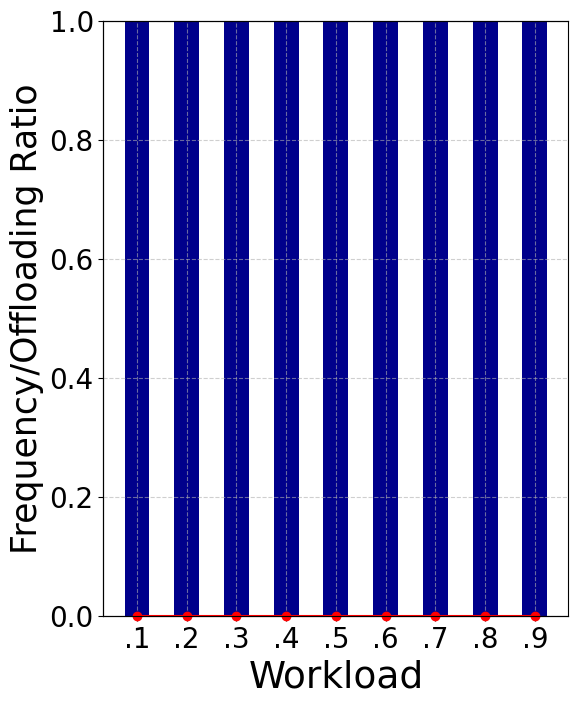

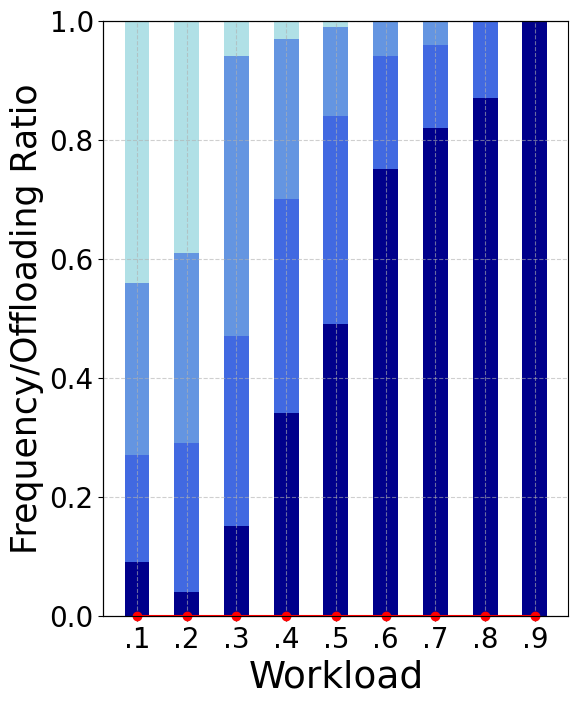

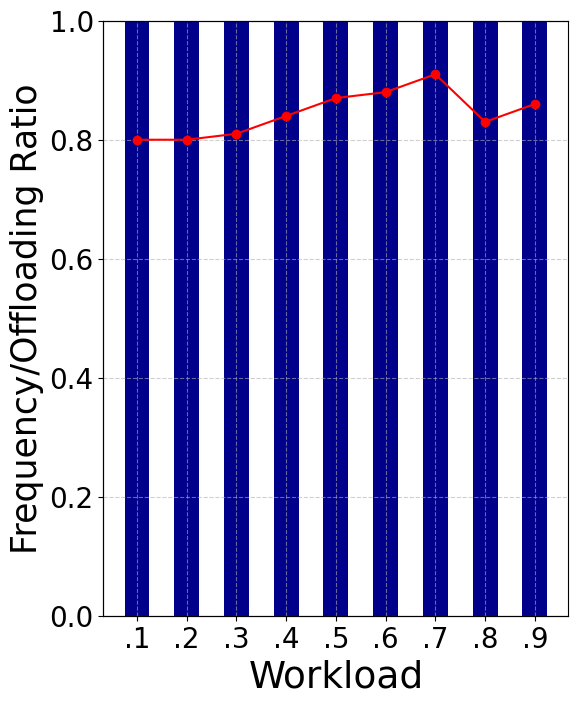

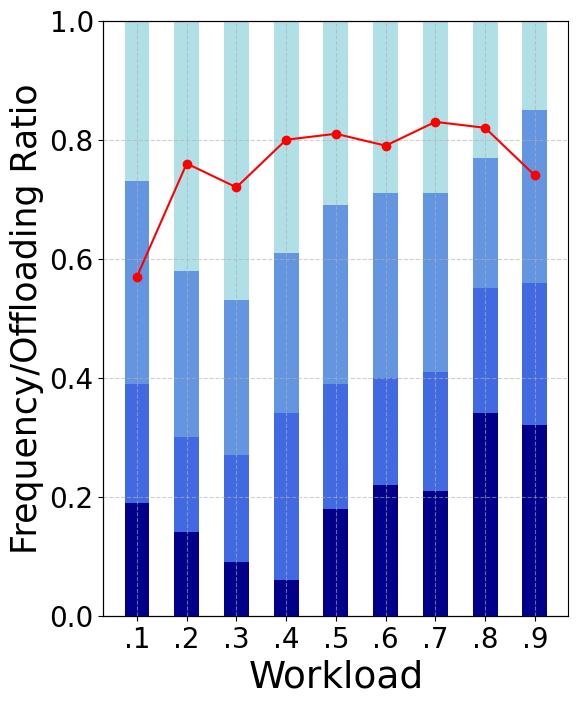

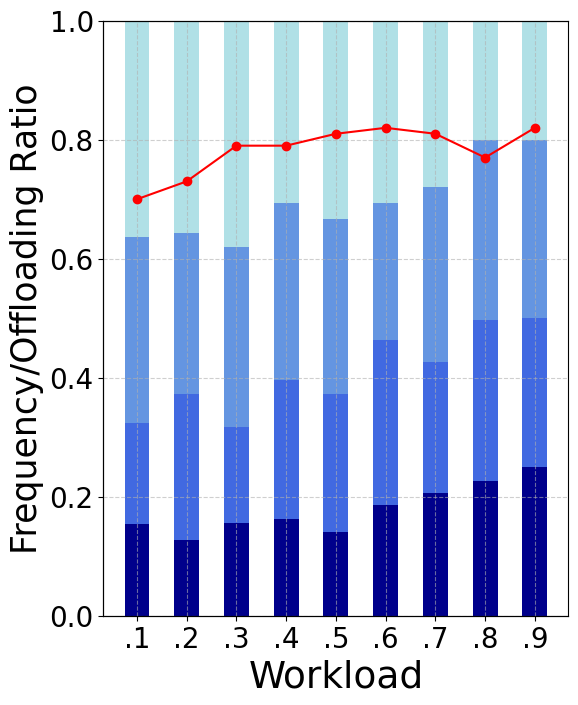

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# CSV 파일을 DataFrame으로 변환 (구분자는 쉼표)
df = pd.read_csv(file_path, sep=",")


# Workload 값 추출
workloads = sorted(df["Workload"].unique())

# CPU Frequency 관련 컬럼 및 색상
cpu_freq_cols = ["CPU_Frequency_1", "CPU_Frequency_0.5", "CPU_Frequency_0.25", "CPU_Frequency_0.125"]
colors = ["#00008B", "#4169E1", "#6495E1", "#B0E0E6"]

# 범례 라벨 매핑
freq_labels = {
    "CPU_Frequency_1": "1",
    "CPU_Frequency_0.5": "0.5",
    "CPU_Frequency_0.25": "0.25",
    "CPU_Frequency_0.125": "0.125"
}

# 분석 방법 매핑
method_mapping = {
    "Baseline": "Baseline",
    "DVS": "DVFS",
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT"
}

# 그래프 생성
for method_label, section_value in method_mapping.items():
    df_method = df[df["Section"] == section_value].copy()
    cpu_freq_data = df_method.groupby("Workload")[cpu_freq_cols].mean().reindex(workloads, fill_value=0)
    row_sums = cpu_freq_data.sum(axis=1).replace(0, 1)
    cpu_freq_data_norm = cpu_freq_data.div(row_sums, axis=0)

    offloading_ratio = df_method.groupby("Workload")["Offloading_Ratio"].mean().reindex(workloads, fill_value=0)

    fig, ax1 = plt.subplots(figsize=(6, 8.5))
    bar_width = 0.5
    positions = np.arange(len(workloads))
    bottom = np.zeros(len(workloads))

    # 스택형 막대 그래프
    for i, freq in enumerate(cpu_freq_cols):
        ax1.bar(positions, cpu_freq_data_norm[freq], bottom=bottom, color=colors[i],
                width=bar_width, label=freq_labels.get(freq, freq))
        bottom += cpu_freq_data_norm[freq].values

    ax1.set_xlabel("Workload", fontsize=27)
    ax1.set_ylabel("Frequency/Offloading Ratio", fontsize=25)
    ax1.set_xticks(positions)

    # 0.1 -> .1 표시
    formatted_workloads = [f".{str(w).split('.')[1]}" for w in workloads]
    ax1.set_xticklabels(formatted_workloads, fontsize=20)



    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.linspace(0, 1, 6))  # y축 눈금: 0~1까지 고정
    ax1.tick_params(axis='y', labelsize=20)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.set_axisbelow(False)

    # Offloading Ratio 라인 그래프
    ax2 = ax1.twinx()
    ax2.plot(positions, offloading_ratio, marker="o", markersize=6, color="red",
             linestyle="-", label="Offloading Ratio", clip_on=False)
    ax2.set_ylim(0, 1)
    ax2.set_yticks([])  # 오른쪽 y축 눈금 제거
    ax2.set_ylabel("")
    ax2.spines["right"].set_visible(False)

    # ------------------------
    # 범례를 아래로 빼서 따로 표시 (그래프 제외)
    # ------------------------
    handles_bar, labels_bar = ax1.get_legend_handles_labels()
    handles_line, labels_line = ax2.get_legend_handles_labels()
    handles = handles_bar + [handles_line[0]]
    labels = labels_bar + [labels_line[0]]

    #fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.005),
   #            ncol=3, fontsize=16, frameon=False)

    # 그래프-범례 간 여백 확보
    plt.subplots_adjust(bottom=0.18)
    plt.show()


Offloading 다시

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shnys\AppData\Local\Temp\ipykernel_27808\1440651226.py:23: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(input_txt), sep="\s+")


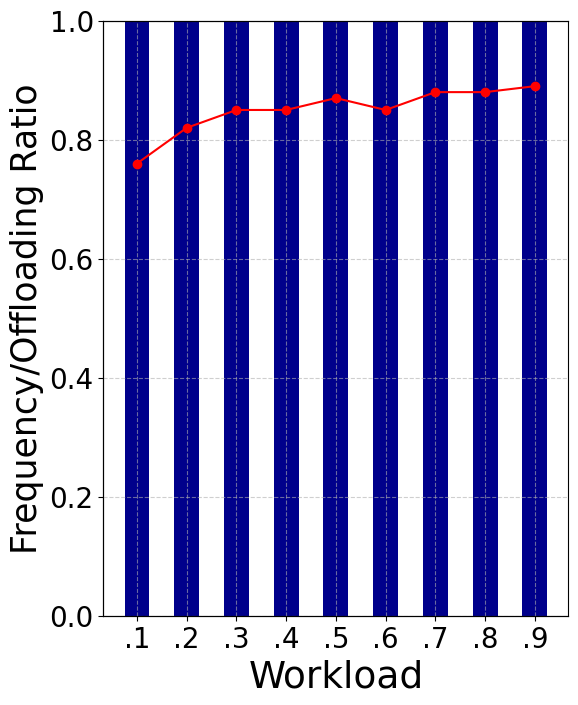

In [ ]:
##### Offlaoding ONLY

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# 입력 텍스트 (복붙 그대로 사용)
input_txt = """
Workload Section Power Util CPU_Power Memory_Power Network_Power Offloading_Ratio CPU_Frequency_1 CPU_Frequency_0.5 CPU_Frequency_0.25 CPU_Frequency_0.125
0.1 Offloading 3.97 .02 2.04 1.30 .62 .76 100.00 0 0 0
0.2 Offloading 6.21 .03 2.71 1.89 1.60 .82 100.00 0 0 0
0.3 Offloading 7.86 .04 3.23 2.19 2.43 .85 100.00 0 0 0
0.4 Offloading 9.82 .07 4.14 2.31 3.36 .85 100.00 0 0 0
0.5 Offloading 10.92 .07 4.36 2.27 4.28 .87 100.00 0 0 0
0.6 Offloading 13.42 .10 5.86 2.38 5.17 .85 100.00 0 0 0
0.7 Offloading 13.57 .09 5.14 2.12 6.29 .88 100.00 0 0 0
0.8 Offloading 16.21 .12 6.57 2.52 7.12 .88 100.00 0 0 0
0.9 Offloading 17.69 .12 6.67 2.71 8.30 .89 100.00 0 0 0
"""

# 텍스트를 DataFrame으로 변환
df = pd.read_csv(StringIO(input_txt), sep="\s+")

# Workload 값 정렬
workloads = sorted(df["Workload"].unique())

# 컬럼 및 색상
cpu_freq_cols = ["CPU_Frequency_1", "CPU_Frequency_0.5", "CPU_Frequency_0.25", "CPU_Frequency_0.125"]
colors = ["#00008B", "#4169E1", "#6495E1", "#B0E0E6"]
freq_labels = {
    "CPU_Frequency_1": "1",
    "CPU_Frequency_0.5": "0.5",
    "CPU_Frequency_0.25": "0.25",
    "CPU_Frequency_0.125": "0.125"
}

# CPU Frequency 정규화
cpu_freq_data = df[cpu_freq_cols].copy()
row_sums = cpu_freq_data.sum(axis=1).replace(0, 1)
cpu_freq_data_norm = cpu_freq_data.div(row_sums, axis=0)

# Offloading Ratio
offloading_ratio = df["Offloading_Ratio"]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(6, 8.5))
bar_width = 0.5
positions = np.arange(len(workloads))
bottom = np.zeros(len(workloads))

# 스택형 막대 그래프
for i, freq in enumerate(cpu_freq_cols):
    ax1.bar(positions, cpu_freq_data_norm[freq], bottom=bottom, color=colors[i],
            width=bar_width, label=freq_labels[freq])
    bottom += cpu_freq_data_norm[freq].values

ax1.set_xlabel("Workload", fontsize=27)
ax1.set_ylabel("Frequency/Offloading Ratio", fontsize=25)
ax1.set_xticks(positions)

# 0.1 -> .1 표시
formatted_workloads = [f".{str(w).split('.')[1]}" for w in workloads]
ax1.set_xticklabels(formatted_workloads, fontsize=20)


ax1.set_ylim(0, 1)
ax1.set_yticks(np.linspace(0, 1, 6))
ax1.tick_params(axis='y', labelsize=20)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_axisbelow(False)

# Offloading Ratio 라인 그래프
ax2 = ax1.twinx()
ax2.plot(positions, offloading_ratio, marker="o", markersize=6, color="red",
         linestyle="-", label="Offloading Ratio", clip_on=False)
ax2.set_ylim(0, 1)
ax2.set_yticks([])
ax2.set_ylabel("")
ax2.spines["right"].set_visible(False)

# 그래프 하단 여백 확보
plt.subplots_adjust(bottom=0.18)
plt.show()


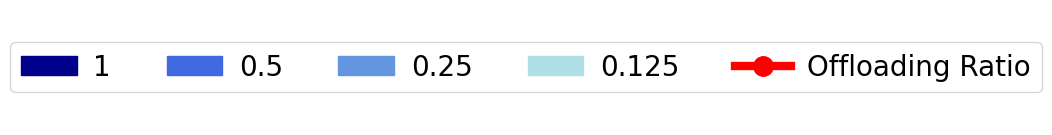

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines



# 색상과 라벨 정의
bar_colors = ["#00008B", "#4169E1", "#6495E1", "#B0E0E6"]
bar_labels = ["1", "0.5", "0.25", "0.125"]

# 막대형 핸들
bar_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(bar_colors, bar_labels)]

# Offloading Ratio 핸들 (선+마커 → 더 큼!)
line_handle = mlines.Line2D([], [], color='red', marker='o',
                            markersize=14, linewidth=6, linestyle='-',
                            label='Offloading Ratio')

# 결합
legend_handles = bar_patches + [line_handle]

# 빈 Figure
fig, ax = plt.subplots(figsize=(6, 1.5))

# 범례 추가
fig.legend(handles=legend_handles, loc="center", ncol=5,
           fontsize=20, frameon=True, handlelength=2, handletextpad=0.6,
           borderaxespad=0.5)

# 축 숨기기
ax.axis('off')

plt.show()



3. Util

In [ ]:
import pandas as pd
from io import StringIO

# 1. 원본 parsed_results.csv 읽기
df_parsed = pd.read_csv("parsed_results.csv", sep=",")

# 2. 제공된 새로운 util 데이터를 문자열로 정의
new_util_data = """
Workload,Section,Power,Util,CPU_Power,Memory_Power,Network_Power,Offloading_Ratio,CPU_Frequency_1,CPU_Frequency_0.5,CPU_Frequency_0.25,CPU_Frequency_0.125
0.1,Tovs,2.45,0.15,0.46,1.50,0.49,0.72,12.33,22.00,28.00,37.66
0.1,Offloading,4.05,0.02,1.91,1.60,0.54,0.78,100.00,0,0,0
0.1,DVFS,3.51,0.50,1.93,1.57,0,0,10.33,15.00,30.33,44.33
0.1,Nothing,7.03,0.09,5.30,1.72,0,0,100.00,0,0,0
0.2,Tovs,3.95,0.34,0.81,1.96,1.17,0.75,14.33,21.33,27.66,36.66
0.2,Offloading,5.58,0.03,2.75,1.53,1.29,0.81,100.00,0,0,0
0.2,DVFS,6.80,1.00,4.95,1.85,0,0,8.66,26.66,34.33,30.33
0.2,Nothing,12.89,0.22,11.07,1.82,0,0,100.00,0,0,0
0.3,Tovs,4.91,0.55,1.27,1.84,1.79,0.76,16.33,19.66,27.66,36.33
0.3,Offloading,7.50,0.05,3.64,1.88,1.96,0.83,100.00,0,0,0
0.3,DVFS,12.47,0.99,9.97,2.49,0,0,19.66,38.33,35.33,6.66
0.3,Nothing,18.41,0.35,16.79,1.62,0,0,100.00,0,0,0
0.4,Tovs,6.12,0.71,1.54,2.06,2.51,0.76,14.66,20.66,26.00,38.66
0.4,Offloading,9.02,0.06,3.84,2.32,2.84,0.86,100.00,0,0,0
0.4,DVFS,18.88,1.00,15.73,3.15,0,0,34.33,42.33,22.00,1.33
0.4,Nothing,24.30,0.47,22.39,1.90,0,0,100.00,0,0,0
0.5,Tovs,7.60,0.67,1.78,2.31,3.50,0.82,14.66,19.33,30.66,35.33
0.5,Offloading,11.49,0.09,5.36,2.46,3.66,0.83,100.00,0,0,0
0.5,DVFS,25.18,0.99,21.91,3.26,0,0,54.33,32.00,13.66,0
0.5,Nothing,29.38,0.59,27.64,1.73,0,0,100.00,0,0,0
0.6,Tovs,9.36,0.73,2.16,2.82,4.37,0.82,17.33,22.66,27.33,32.66
0.6,Offloading,12.01,0.09,5.25,2.15,4.60,0.87,100.00,0,0,0
0.6,DVFS,32.53,0.99,29.26,3.26,0,0,68.66,25.00,6.33,0
0.6,Nothing,35.61,0.73,33.73,1.87,0,0,100.00,0,0,0
0.7,Tovs,10.27,0.85,2.76,2.57,4.93,0.80,26.33,22.00,24.33,27.33
0.7,Offloading,13.95,0.11,6.23,2.45,5.26,0.85,100.00,0,0,0
0.7,DVFS,38.58,1.00,35.15,3.43,0,0,81.66,15.33,2.66,0.33
0.7,Nothing,40.28,0.83,38.64,1.63,0,0,100.00,0,0,0
0.8,Tovs,12.26,0.84,4.07,2.74,5.44,0.79,20.66,27.66,33.66,18.00
0.8,Offloading,15.71,0.13,7.23,2.58,5.88,0.85,100.00,0,0,0
0.8,DVFS,46.62,0.99,42.74,3.87,0,0,94.00,5.33,0.66,0
0.8,Nothing,46.50,0.97,44.65,1.84,0,0,100.00,0,0,0
0.9,Tovs,14.47,0.87,5.83,2.55,6.08,0.77,29.00,27.00,24.33,19.66
0.9,Offloading,17.68,0.15,8.12,2.84,6.71,0.85,100.00,0,0,0
0.9,DVFS,54.02,1.00,48.01,6.01,0,0,100.00,0,0,0
0.9,Nothing,53.91,0.99,48.00,5.90,0,0,100.00,0,0,0
"""

# 3. 새 util 데이터를 DataFrame으로 변환
df_new_util = pd.read_csv(StringIO(new_util_data), sep=",")

# 4. parsed_results의 Section에 대해 새 util 데이터를 참조할 Section 이름 생성
# 매핑 규칙:
# - "Baseline"은 새 데이터에서 "Nothing"을 사용
# - "CO-DMO"는 새 데이터에서 "Tovs"를 사용
# 나머지 (DVFS, Offloading 등)는 그대로 사용.
df_parsed["section_new"] = df_parsed["Section"].replace({
    "Baseline": "Nothing",
    "CO-DMO": "Tovs"
})

# 5. Workload와 section_new를 기준으로 새 util 값을 병합(왼쪽 조인)
df_merged = pd.merge(
    df_parsed,
    df_new_util[["Workload", "Section", "Util"]],
    left_on=["Workload", "section_new"],
    right_on=["Workload", "Section"],
    how="left",
    suffixes=("", "_new")
)

# 6. 새 util 값이 존재하면 기존 "Util"을 새 값으로 업데이트
df_merged["Util"] = df_merged["Util_new"].combine_first(df_merged["Util"])

# 7. 불필요한 컬럼 삭제 (새로 생성한 section_new와 오른쪽의 Section 컬럼)
df_merged.drop(columns=["section_new", "Section_new"] if "Section_new" in df_merged.columns else ["section_new", "Section"], inplace=True)

# 8. 결과 CSV 파일로 저장
df_merged.to_csv("updated_results.csv", index=False)
print("업데이트된 CSV 파일 'updated_results.csv'가 생성되었습니다.")

업데이트된 CSV 파일 'updated_results.csv'가 생성되었습니다.


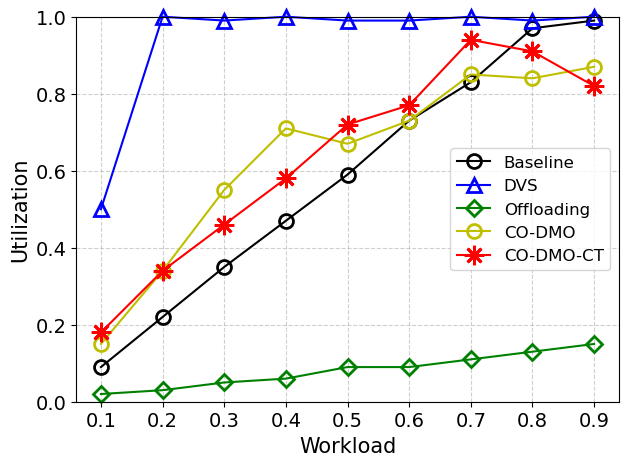

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
df = pd.read_csv("updated_results.csv")

# Workload 값 추출 (예: 0.1 ~ 0.9)
workloads = sorted(df["Workload"].unique())

# 분석할 각 방법 (CSV의 Section 열에 해당하는 값들)
# CSV의 Section 값은 여전히 "DVFS"일 수 있으므로 필터링은 그대로 두되, 범례 표기를 "DVS"로 변경
methods = ["Baseline", "DVFS", "Offloading", "CO-DMO", "CO-DMO-CT"]
legend_labels = {
    "Baseline": "Baseline",
    "DVFS": "DVS",           # 범례에서는 "DVS"로 표기
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT"
}

# 에너지 그래프와 동일한 스타일 적용:
# Baseline: 'ko-'  → marker: 'o', color: 'k', markersize: 10
# DVFS: 'b^-'       → marker: '^', color: 'b', markersize: 10 (범례에서는 DVS로 표기)
# Offloading: 'gD-'  → marker: 'D', color: 'g', markersize: 8
# CO-DMO: 'yo-'     → marker: 'o', color: 'y', markersize: 10
# CO-DMO-CT: marker=(8,2,0), color: 'r', markersize: 14
colors = {
    "Baseline": "k",
    "DVFS": "b",
    "Offloading": "g",
    "CO-DMO": "y",
    "CO-DMO-CT": "r"
}
markers = {
    "Baseline": "o",
    "DVFS": "^",
    "Offloading": "D",
    "CO-DMO": "o",
    "CO-DMO-CT": (8, 2, 0)
}
marker_sizes = {
    "Baseline": 10,
    "DVFS": 10,
    "Offloading": 8,
    "CO-DMO": 10,
    "CO-DMO-CT": 14
}

fig, ax = plt.subplots(figsize=(7, 5))

for method in methods:
    # 해당 방법의 데이터 필터링 (CSV에서는 DVFS로 표기되어 있음)
    df_method = df[df["Section"] == method]
    # Workload별 평균 Util 계산 (없으면 0 채움)
    utilization = df_method.groupby("Workload")["Util"].mean().reindex(workloads, fill_value=0)
    x_vals = np.array(workloads)

    ax.plot(
        x_vals,
        utilization,
        marker=markers[method],
        markersize=marker_sizes[method],
        linestyle="-",
        color=colors[method],
        label=legend_labels[method],
        clip_on=False,
        markerfacecolor="none",  # 속이 빈 형태
        markeredgewidth=2
    )

ax.set_xlabel("Workload", fontsize=15)
ax.set_ylabel("Utilization", fontsize=15)
ax.set_xticks(workloads)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0, 1)
ax.grid(True, linestyle='--', alpha=0.6)

# 기존 자동 legend → handles 추출 후 역순 정렬
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)


ax.legend(fontsize=12)

plt.show()



Util 선 얇게

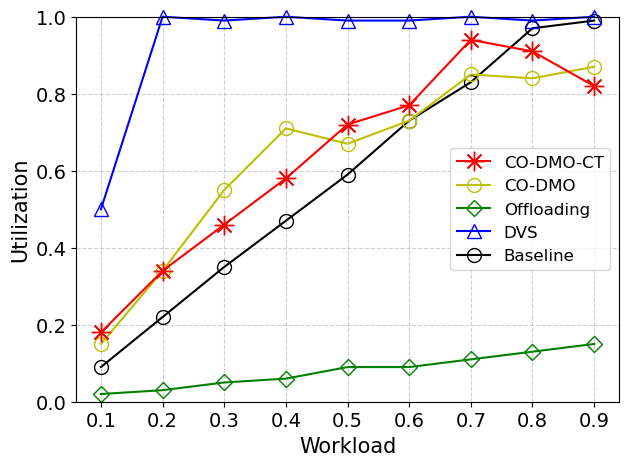

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 읽기
df = pd.read_csv("updated_results.csv")

# Workload 값 추출 (예: 0.1 ~ 0.9)
workloads = sorted(df["Workload"].unique())

# 사용할 섹션 및 범례 표기 (CSV의 Section 값은 그대로 사용하되, 범례 표기를 변경)
methods = ["Baseline", "DVFS", "Offloading", "CO-DMO", "CO-DMO-CT"]
legend_labels = {
    "Baseline": "Baseline",
    "DVFS": "DVS",           # 범례에서는 "DVS"로 표기
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT"
}

# 에너지 그래프와 동일한 스타일 적용:
# - Baseline: 'ko-'  → marker: 'o', color: 'k', markersize: 10
# - DVFS: 'b^-'       → marker: '^', color: 'b', markersize: 10
# - Offloading: 'gD-'  → marker: 'D', color: 'g', markersize: 8
# - CO-DMO: 'yo-'     → marker: 'o', color: 'y', markersize: 10
# - CO-DMO-CT: marker=(8,2,0), color: 'r', markersize: 14
colors = {
    "Baseline": "k",
    "DVFS": "b",
    "Offloading": "g",
    "CO-DMO": "y",
    "CO-DMO-CT": "r"
}
markers = {
    "Baseline": "o",
    "DVFS": "^",
    "Offloading": "D",
    "CO-DMO": "o",
    "CO-DMO-CT": (8, 2, 0)
}
marker_sizes = {
    "Baseline": 10,
    "DVFS": 10,
    "Offloading": 8,
    "CO-DMO": 10,
    "CO-DMO-CT": 14
}

plt.figure(figsize=(7, 5))

# 각 섹션별로 Util 값 평균을 계산하여 플롯 (에너지 그래프와 동일한 표식자, 색상, 선 스타일)
for method in methods:
    df_method = df[df["Section"] == method]
    # Workload별 평균 Util 계산 (없으면 0으로 채움)
    utilization = df_method.groupby("Workload")["Util"].mean().reindex(workloads, fill_value=0)
    x_vals = np.array(workloads)

    if method == "CO-DMO-CT":
        plt.plot(x_vals, utilization,
                 marker=markers[method],
                 color=colors[method],
                 label=legend_labels[method],
                 markersize=marker_sizes[method],
                 clip_on=False)
    elif method == "CO-DMO":
        plt.plot(x_vals, utilization,
                 'yo-', label=legend_labels[method],
                 markersize=marker_sizes[method],
                 markerfacecolor='none',
                 clip_on=False)
    elif method == "Offloading":
        plt.plot(x_vals, utilization,
                 'gD-', label=legend_labels[method],
                 markersize=marker_sizes[method],
                 markerfacecolor='none',
                 clip_on=False)
    elif method == "DVFS":
        plt.plot(x_vals, utilization,
                 'b^-', label=legend_labels[method],
                 markersize=marker_sizes[method],
                 markerfacecolor='none',
                 clip_on=False)
    elif method == "Baseline":
        plt.plot(x_vals, utilization,
                 'ko-', label=legend_labels[method],
                 markersize=marker_sizes[method],
                 markerfacecolor='none',
                 clip_on=False)

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Utilization", fontsize=15)
plt.xticks(workloads, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# 기존 자동 legend → handles 추출 후 역순 정렬
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)

plt.show()



4. Convergence

5. Deadline

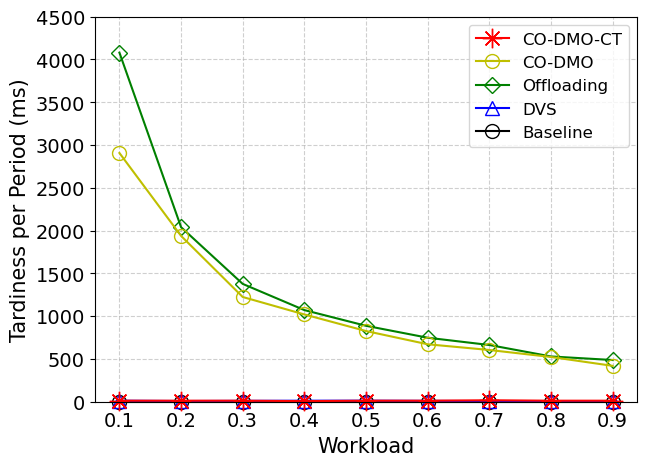

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Workload
workloads = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
x_vals = np.array(workloads)

# Tardiness 데이터
tardiness_data = {
    "Baseline": [0, 0, 0, 0, 0, 0, 0, 0, 0],
    "DVFS": [12, 8, 10, 12, 12, 10, 7, 7, 8],
    "Offloading": [4080, 2040, 1377, 1071, 887.4, 748, 663, 529.125, 487.33],
    "CO-DMO": [2907, 1938, 1224, 1020, 826.2, 671.5, 604.71, 522.75, 419.33],
    "CO-DMO-CT": [12, 12, 12, 7, 12, 12, 17, 12, 12]
}

# 스타일 정의
legend_labels = {
    "Baseline": "Baseline",
    "DVFS": "DVS",
    "Offloading": "Offloading",
    "CO-DMO": "CO-DMO",
    "CO-DMO-CT": "CO-DMO-CT"
}

colors = {
    "Baseline": "k",
    "DVFS": "b",
    "Offloading": "g",
    "CO-DMO": "y",
    "CO-DMO-CT": "r"
}

markers = {
    "Baseline": "o",
    "DVFS": "^",
    "Offloading": "D",
    "CO-DMO": "o",
    "CO-DMO-CT": (8, 2, 0)
}

marker_sizes = {
    "Baseline": 10,
    "DVFS": 10,
    "Offloading": 8,
    "CO-DMO": 10,
    "CO-DMO-CT": 14
}

# 그래프
plt.figure(figsize=(7, 5))

for method in tardiness_data:
    if method == "CO-DMO-CT":
        plt.plot(x_vals, tardiness_data[method],
                 marker=markers[method],
                 color=colors[method],
                 label=legend_labels[method],
                 markersize=marker_sizes[method],
                 clip_on=False)
    else:
        plt.plot(x_vals, tardiness_data[method],
                 marker=markers[method],
                 color=colors[method],
                 linestyle='-',
                 label=legend_labels[method],
                 markersize=marker_sizes[method],
                 markerfacecolor='none',  # 내부 비우기
                 clip_on=False)

plt.xlabel("Workload", fontsize=15)
plt.ylabel("Tardiness per Period (ms)", fontsize=15)
plt.xticks(workloads, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 4500)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# 기존 자동 legend → handles 추출 후 역순 정렬
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)


plt.show()



Convergence

C:\Users\shnys\AppData\Local\Temp\ipykernel_27808\735893307.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)


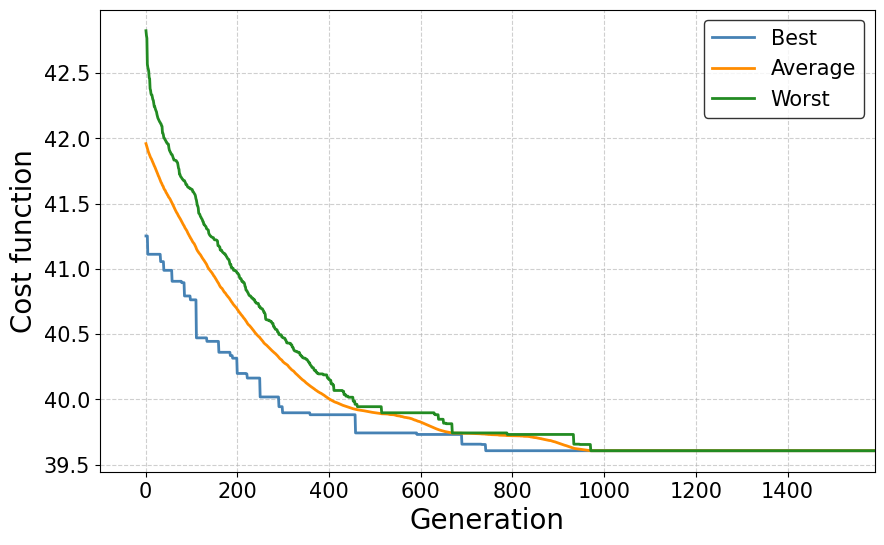

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 로드
file_path = "report.txt"

# 데이터 읽기
columns = [
    "generation", "power_min", "power_avg", "power_max", "util_min", "util_avg", "util_max"
]
df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)

plt.figure(figsize=(10, 6))
plt.plot(df["generation"], df["power_min"], label="Best", color="#4682B4", linewidth=2)
plt.plot(df["generation"], df["power_avg"], label="Average", color="#FF8C00", linewidth=2)
plt.plot(df["generation"], df["power_max"], label="Worst", color="#228B22", linewidth=2)


# 라벨 및 제목
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Cost function", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-100,1590)

# 범례 추가
plt.legend(fontsize=15, frameon=True, edgecolor="black", loc="upper right", bbox_to_anchor=(1, 1))

# 그래프 저장 및 출력
plt.savefig("convergence_cost.png", bbox_inches="tight")
plt.show()

C:\Users\shnys\AppData\Local\Temp\ipykernel_27808\3678030856.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)


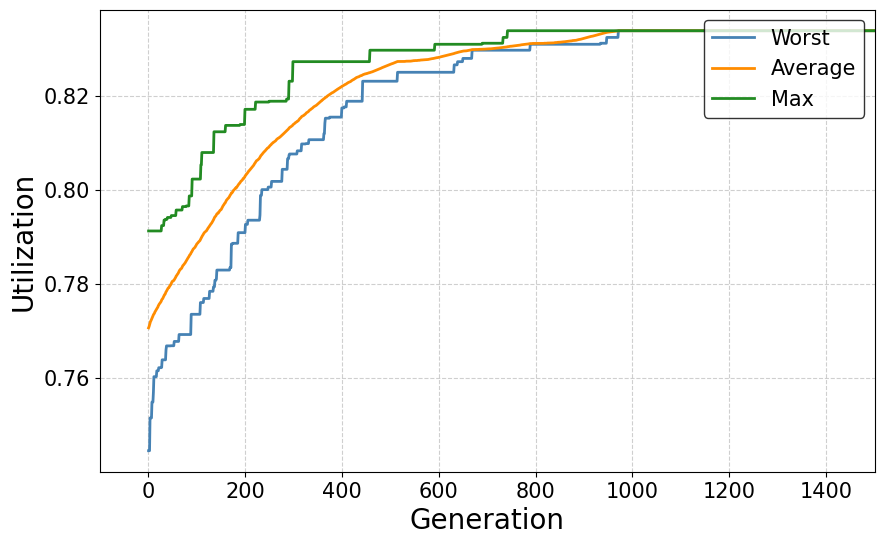

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 로드
file_path = "report.txt"

# 데이터 읽기
columns = [
    "generation", "power_min", "power_avg", "power_max", "util_min", "util_avg", "util_max"
]
df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)

plt.figure(figsize=(10, 6))

plt.plot(df["generation"], df["util_min"], label="Worst", color="#4682B4", linewidth=2)
plt.plot(df["generation"], df["util_avg"], label="Average", color="#FF8C00", linewidth=2)
plt.plot(df["generation"], df["util_max"], label="Max", color="#228B22", linewidth=2)

# 라벨 및 제목
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-100,1500)

# 범례 추가
plt.legend(fontsize=15, frameon=True, edgecolor="black", loc="upper right", bbox_to_anchor=(1, 1))

# 그래프 저장 및 출력
plt.savefig("convergence_util.png", bbox_inches="tight")
plt.show()

C:\Users\shnys\AppData\Local\Temp\ipykernel_27808\3416080763.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)


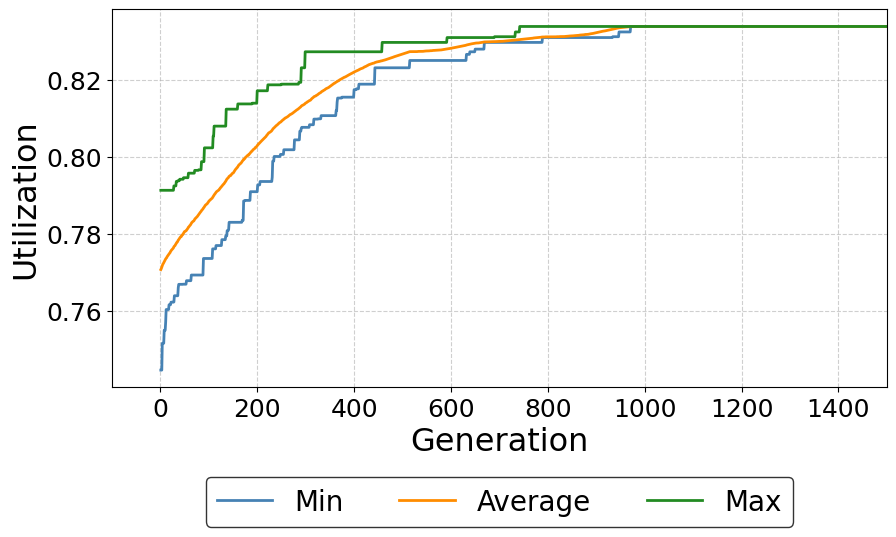

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 로드
file_path = "report.txt"

# 데이터 읽기
columns = [
    "generation", "power_min", "power_avg", "power_max", "util_min", "util_avg", "util_max"
]
df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)

plt.figure(figsize=(10, 6))

plt.plot(df["generation"], df["util_min"], label="Min", color="#4682B4", linewidth=2)
plt.plot(df["generation"], df["util_avg"], label="Average", color="#FF8C00", linewidth=2)
plt.plot(df["generation"], df["util_max"], label="Max", color="#228B22", linewidth=2)

# 라벨 및 제목
plt.xlabel("Generation", fontsize=23)
plt.ylabel("Utilization", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-100, 1500)

# 범례를 그래프 아래 중앙에 배치
plt.legend(
    fontsize=20,
    frameon=True,
    edgecolor="black",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=3
)

# 여백 조절
plt.subplots_adjust(bottom=0.25)

# 그래프 저장 및 출력
plt.savefig("convergence_util.png", bbox_inches="tight")
plt.show()


C:\Users\shnys\AppData\Local\Temp\ipykernel_27808\2854857481.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)


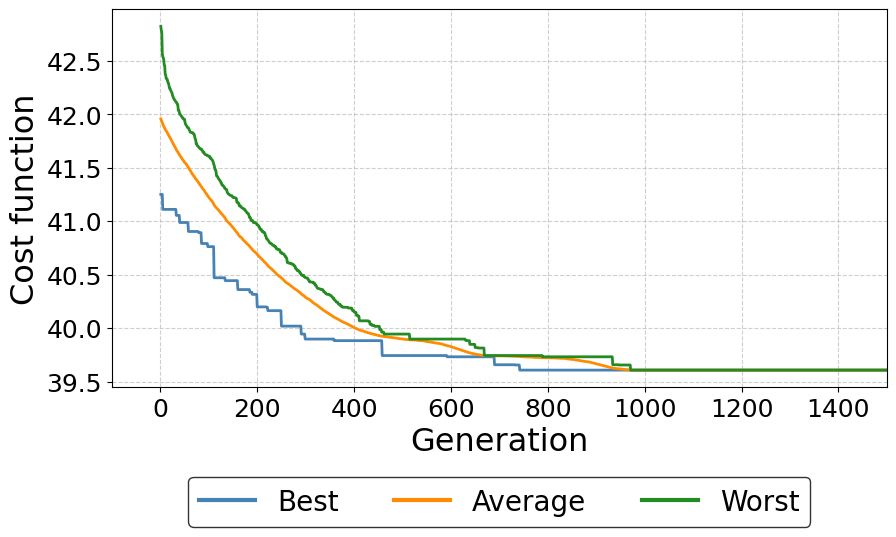

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 로드
file_path = "report.txt"

# 데이터 읽기
columns = [
    "generation", "power_min", "power_avg", "power_max", "util_min", "util_avg", "util_max"
]
df = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)

plt.figure(figsize=(10, 6))

plt.plot(df["generation"], df["power_min"], label="Best", color="#4682B4", linewidth=2)
plt.plot(df["generation"], df["power_avg"], label="Average", color="#FF8C00", linewidth=2)
plt.plot(df["generation"], df["power_max"], label="Worst", color="#228B22", linewidth=2)

# 라벨 및 제목
plt.xlabel("Generation", fontsize=23)
plt.ylabel("Cost function", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-100, 1500)

# 범례를 그래프 아래 중앙에 배치
legend = plt.legend(
    fontsize=20,
    frameon=True,
    edgecolor="black",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=3
)

# 범례 선 굵게
for legline in legend.get_lines():
    legline.set_linewidth(3)

# 여백 조절
plt.subplots_adjust(bottom=0.25)

# 그래프 저장 및 출력
plt.savefig("convergence_cost.png", bbox_inches="tight")
plt.show()
